# Garmin Daily Summary Analysis
I've had my garmin forerunner 245 music since January and wanted to see what my days and weeks looked like.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 999)


In [2]:
df_days_avg = pd.read_csv('data/garmin_days_summary.csv')


In [3]:
df_days_avg.head()


,day,hr_avg,hr_min,hr_max,rhr,inactive_hr,weight,intensity_time,moderate_activity_time,vigorous_activity_time,steps,steps_goal_percent,floors,floors_goal_percent,sleep_avg,rem_sleep_avg,stress_avg,calories_avg,calories_bmr_avg,calories_active_avg,calories_consumed_avg,calories_goal,activities,activities_calories,activities_distance,hydration_goal,hydration_avg,sweat_loss_avg,spo2_avg,spo2_min,rr_waking_avg,rr_max,rr_min,bb_max,bb_min
0,2023-04-21,64.9,41.0,151.0,NaN,64.4,NaN,00:00:00.000000,00:00:00.000000,00:00:00.000000,4398,NaN,8.7,NaN,00:00:00.000000,00:00:00.000000,21.0,NaN,NaN,996.0,NaN,NaN,1.0,424.0,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-20,79.3,46.0,157.0,49.0,78.7,NaN,00:41:00.000000,00:01:00.000000,00:20:00.000000,8778,58.0,7.3,73.0,05:31:00.000000,00:53:00.000000,34.0,3369.0,2572.0,797.0,0.0,2659.0,1.0,337.0,2.1,100.0,0.0,17.0,NaN,NaN,13.0,23.0,10.0,87.0,5.0
2,2023-04-19,78.7,43.0,171.0,47.0,66.6,237.2,01:52:00.000000,00:10:00.000000,00:51:00.000000,17652,123.0,0.0,0.0,06:48:00.000000,01:00:00.000000,40.0,3833.0,2572.0,1261.0,0.0,2659.0,1.0,700.0,4.3,100.0,0.0,17.0,NaN,NaN,14.0,21.0,11.0,58.0,5.0
3,2023-04-18,75.9,43.0,165.0,45.0,59.1,238.8,02:14:00.000000,00:18:00.000000,00:58:00.000000,17699,127.0,0.0,0.0,08:44:00.000000,00:34:00.000000,27.0,4016.0,2581.0,1435.0,NaN,2659.0,2.0,894.0,2.5,100.0,0.0,15.0,NaN,NaN,13.0,20.0,11.0,82.0,5.0
4,2023-04-17,73.1,43.0,126.0,46.0,60.7,237.8,00:49:00.000000,00:49:00.000000,00:00:00.000000,12125,84.0,0.0,0.0,07:51:00.000000,01:06:00.000000,32.0,3254.0,2576.0,678.0,1267.0,2659.0,2.0,412.0,0.0,100.0,0.0,11.0,NaN,NaN,13.0,21.0,10.0,77.0,5.0


In [4]:
df_days_avg.columns


Index(['day', 'hr_avg', 'hr_min', 'hr_max', 'rhr', 'inactive_hr', 'weight',
       'intensity_time', 'moderate_activity_time', 'vigorous_activity_time',
       'steps', 'steps_goal_percent', 'floors', 'floors_goal_percent',
       'sleep_avg', 'rem_sleep_avg', 'stress_avg', 'calories_avg',
       'calories_bmr_avg', 'calories_active_avg', 'calories_consumed_avg',
       'calories_goal', 'activities', 'activities_calories',
       'activities_distance', 'hydration_goal', 'hydration_avg',
       'sweat_loss_avg', 'spo2_avg', 'spo2_min', 'rr_waking_avg', 'rr_max',
       'rr_min', 'bb_max', 'bb_min'],
      dtype='object')

In [5]:
df_days_avg.shape


(103, 35)

## Data Cleaning

### Create df_summary

Taking out all of the unwanted rows from df_days_avg


In [6]:
df_summary = df_days_avg[['day', 'hr_avg', 'hr_min', 'hr_max', 'rhr', 'inactive_hr', 'weight',
                          'intensity_time', 'moderate_activity_time', 'vigorous_activity_time',
                          'steps', 'steps_goal_percent',
                          'sleep_avg', 'rem_sleep_avg', 'stress_avg', 'calories_avg',
                          'calories_bmr_avg', 'calories_active_avg', 'calories_consumed_avg',
                          'calories_goal', 'activities', 'activities_calories',
                          'activities_distance', 'sweat_loss_avg', ]]


In [7]:
df_summary.head()


,day,hr_avg,hr_min,hr_max,rhr,inactive_hr,weight,intensity_time,moderate_activity_time,vigorous_activity_time,steps,steps_goal_percent,sleep_avg,rem_sleep_avg,stress_avg,calories_avg,calories_bmr_avg,calories_active_avg,calories_consumed_avg,calories_goal,activities,activities_calories,activities_distance,sweat_loss_avg
0,2023-04-21,64.9,41.0,151.0,NaN,64.4,NaN,00:00:00.000000,00:00:00.000000,00:00:00.000000,4398,NaN,00:00:00.000000,00:00:00.000000,21.0,NaN,NaN,996.0,NaN,NaN,1.0,424.0,2.7,NaN
1,2023-04-20,79.3,46.0,157.0,49.0,78.7,NaN,00:41:00.000000,00:01:00.000000,00:20:00.000000,8778,58.0,05:31:00.000000,00:53:00.000000,34.0,3369.0,2572.0,797.0,0.0,2659.0,1.0,337.0,2.1,17.0
2,2023-04-19,78.7,43.0,171.0,47.0,66.6,237.2,01:52:00.000000,00:10:00.000000,00:51:00.000000,17652,123.0,06:48:00.000000,01:00:00.000000,40.0,3833.0,2572.0,1261.0,0.0,2659.0,1.0,700.0,4.3,17.0
3,2023-04-18,75.9,43.0,165.0,45.0,59.1,238.8,02:14:00.000000,00:18:00.000000,00:58:00.000000,17699,127.0,08:44:00.000000,00:34:00.000000,27.0,4016.0,2581.0,1435.0,NaN,2659.0,2.0,894.0,2.5,15.0
4,2023-04-17,73.1,43.0,126.0,46.0,60.7,237.8,00:49:00.000000,00:49:00.000000,00:00:00.000000,12125,84.0,07:51:00.000000,01:06:00.000000,32.0,3254.0,2576.0,678.0,1267.0,2659.0,2.0,412.0,0.0,11.0


In [8]:
df_summary['day'] = pd.to_datetime(df_summary['day'])


/tmp/ipykernel_47931/3164302938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary['day'] = pd.to_datetime(df_summary['day'])


In [9]:
df_summary.dtypes


day                       datetime64[ns]
hr_avg                           float64
hr_min                           float64
hr_max                           float64
rhr                              float64
inactive_hr                      float64
weight                           float64
intensity_time                    object
moderate_activity_time            object
vigorous_activity_time            object
steps                              int64
steps_goal_percent               float64
sleep_avg                         object
rem_sleep_avg                     object
stress_avg                       float64
calories_avg                     float64
calories_bmr_avg                 float64
calories_active_avg              float64
calories_consumed_avg            float64
calories_goal                    float64
activities                       float64
activities_calories              float64
activities_distance              float64
sweat_loss_avg                   float64
dtype: object

In [10]:
df_summary = df_summary.sort_values(
    by=['day'], ascending=True, ignore_index=True)


In [11]:
df_summary['sleep_avg'] = df_summary['sleep_avg'].apply(
    lambda x: "{}.{}".format(x.split(':', 2)[0], x.split(':', 2)[1]))


In [12]:
df_summary['sleep_avg'] = pd.to_numeric(df_summary['sleep_avg'])
df_summary['day_of_week'] = df_summary['day'].apply(lambda x: x.day_name())


In [13]:
df_summary['week'] = df_summary['day'].apply(lambda x: x.isocalendar().week)


## Data Visualization 

### Weight Loss

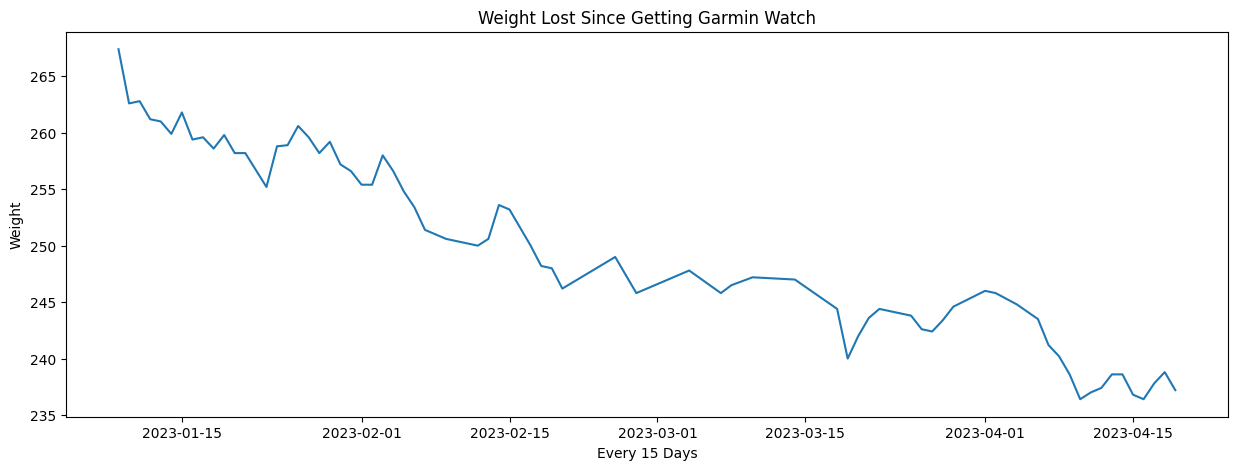

In [14]:
fig, ax1 = plt.subplots(figsize=(15, 5))

weight_loss = sns.lineplot(
    x='day', y='weight', data=df_summary, ax=ax1, )
weight_loss.set_xlabel('Every 15 Days')
weight_loss.set_ylabel('Weight')
weight_loss.set_title('Weight Lost Since Getting Garmin Watch')


plt.show()


### Average Calories Burned per Day and per Activity

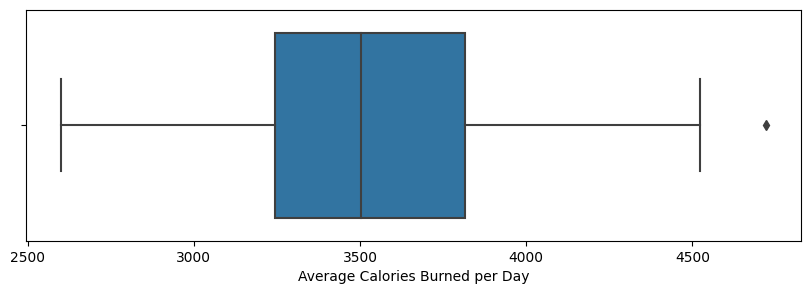

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))

calories_average = sns.boxplot(x='calories_avg', data=df_summary, )
calories_average.set_xlabel('Average Calories Burned per Day')

plt.show()


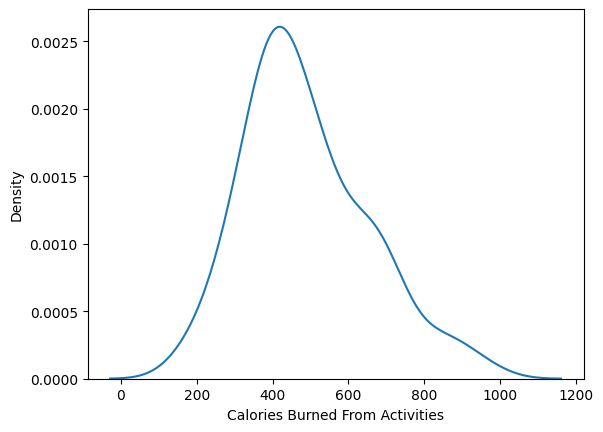

In [16]:
burned_calories = sns.kdeplot(x='activities_calories', data=df_summary, )
burned_calories.set_xlabel('Calories Burned From Activities')

plt.show()


<Axes: ylabel='Frequency'>

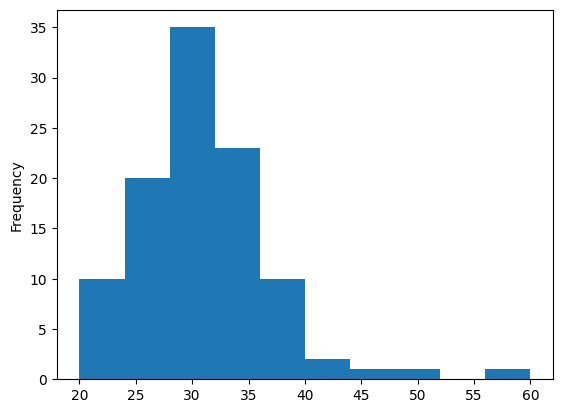

In [17]:
df_summary['stress_avg'].plot(kind='hist')


### Daily Miles, Stress, and Actities average

In [18]:
df_days_avg = df_summary.groupby(['day_of_week']).agg({
    'activities_distance': 'mean',
    'calories_avg': 'mean',
    'steps': 'mean',
    'sleep_avg': 'mean',
    'stress_avg': 'mean',
    'activities': 'mean'
}).reset_index()

df_days_avg


,day_of_week,activities_distance,calories_avg,steps,sleep_avg,stress_avg,activities
0,Friday,1.750000,3888.642857,13392.066667,6.427333,34.600000,1.833333
1,Monday,1.300000,3478.000000,10846.933333,7.670667,28.666667,2.000000
2,Saturday,1.246154,3681.785714,12834.571429,7.663571,32.000000,1.692308
3,Sunday,2.090000,3339.214286,11191.142857,6.824286,28.928571,1.500000
4,Thursday,1.853846,3290.400000,7677.266667,7.553333,30.800000,1.846154
5,Tuesday,1.993333,3707.333333,13729.400000,8.470667,29.600000,2.200000
6,Wednesday,2.792857,3326.266667,8457.133333,6.211333,29.933333,1.785714


Text(0, 0.5, '# of Activities')

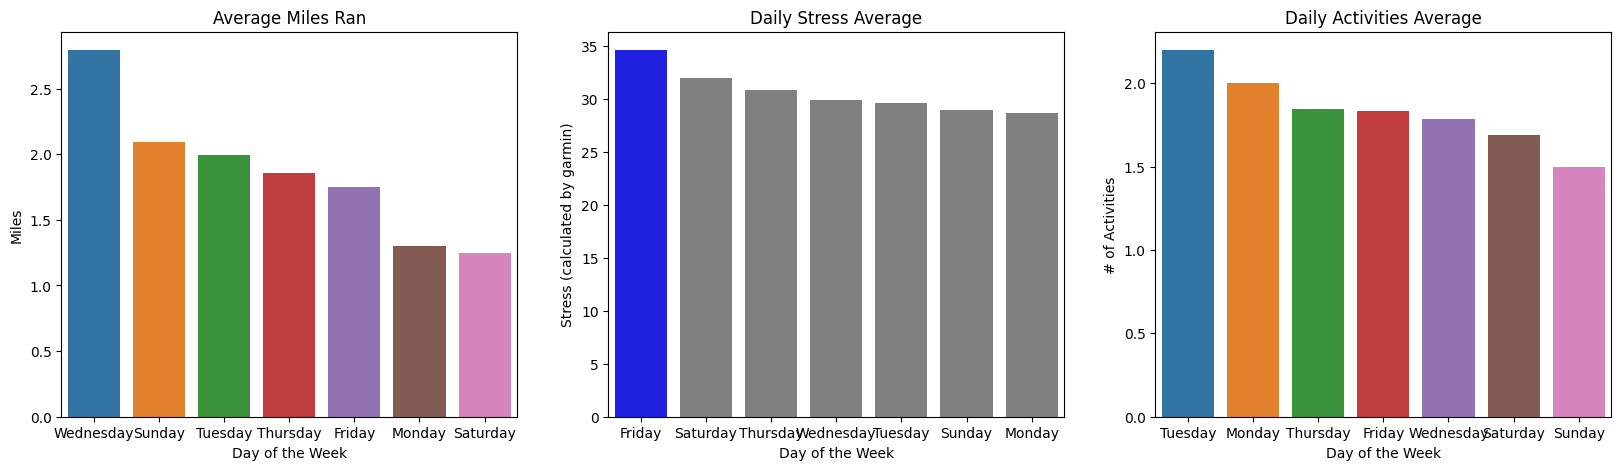

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))


daily_distance = sns.barplot(x='day_of_week', y='activities_distance', data=df_days_avg, order=df_days_avg.sort_values(
    by='activities_distance', ascending=False).day_of_week, ax=ax[0], )
daily_distance.set_title('Average Miles Ran')
daily_distance.set_xlabel('Day of the Week')
daily_distance.set_ylabel('Miles')


daily_stress = sns.barplot(x='day_of_week', y='stress_avg', data=df_days_avg, order=df_days_avg.sort_values(by='stress_avg',
                           ascending=False).day_of_week, palette=['blue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', ], ax=ax[1])
daily_stress.set_title('Daily Stress Average')
daily_stress.set_xlabel('Day of the Week')
daily_stress.set_ylabel('Stress (calculated by garmin)')


activities_avg = sns.barplot(x='day_of_week', y='activities', data=df_days_avg, order=df_days_avg.sort_values(
    by='activities', ascending=False).day_of_week)
activities_avg.set_title('Daily Activities Average')
activities_avg.set_xlabel('Day of the Week')
activities_avg.set_ylabel('# of Activities')


<Axes: xlabel='day_of_week', ylabel='activities_distance'>

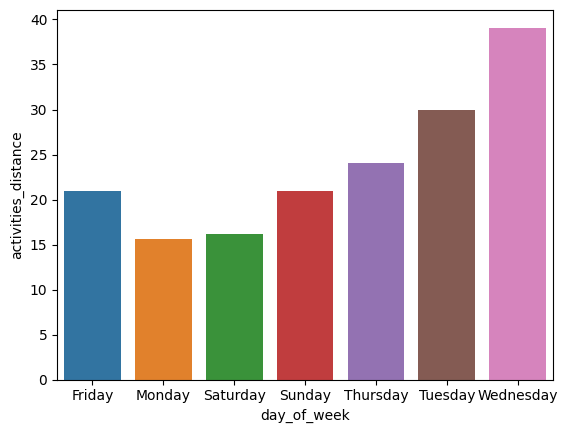

In [20]:
df_days_sum = df_summary.groupby(['day_of_week']).agg({
    'activities_distance': 'sum',
    'calories_avg': 'sum',
    'steps':
    'sum',
    'sleep_avg': 'sum',
    'stress_avg': 'sum',
    'activities': 'sum'
}).reset_index()

sns.barplot(x='day_of_week', y='activities_distance', data=df_days_sum)


<Axes: xlabel='day_of_week', ylabel='sleep_avg'>

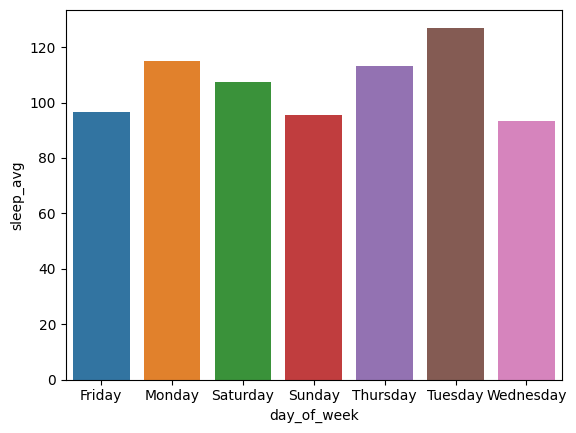

In [21]:
sns.barplot(x='day_of_week', y='sleep_avg', data=df_days_sum)


In [22]:
df_weeks = df_summary.groupby(['week']).agg({
    'activities_distance': 'mean',
    'steps': 'mean',
    'rhr': 'mean',
    'hr_max': 'mean',
    'sleep_avg': 'mean',
    'weight' : 'mean'
}).reset_index()
df_weeks


,week,activities_distance,steps,rhr,hr_max,sleep_avg,weight
0,2,1.716667,9554.285714,50.714286,164.285714,5.871429,262.385714
1,3,1.900000,10507.571429,47.857143,151.714286,8.448571,258.966667
2,4,1.085714,10663.285714,47.857143,163.428571,7.398571,258.642857
3,5,1.871429,12166.571429,48.000000,166.571429,8.067143,256.285714
4,6,2.300000,11912.428571,48.142857,169.714286,6.342857,251.160000
5,7,1.650000,10772.857143,47.857143,154.428571,7.987143,250.600000
6,8,2.620000,11109.142857,49.857143,151.857143,7.270000,247.600000
7,9,1.900000,10545.285714,48.857143,153.857143,7.444286,246.800000
8,10,2.057143,11308.000000,47.571429,158.857143,7.915714,246.500000
9,11,1.900000,10244.857143,48.285714,134.857143,5.934286,243.800000


<Axes: xlabel='weight', ylabel='calories_bmr_avg'>

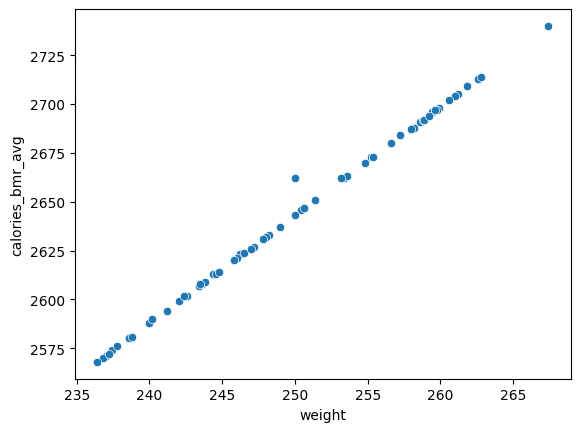

In [23]:
sns.scatterplot(x='weight', y='calories_bmr_avg', data=df_summary)


<Axes: xlabel='steps', ylabel='calories_avg'>

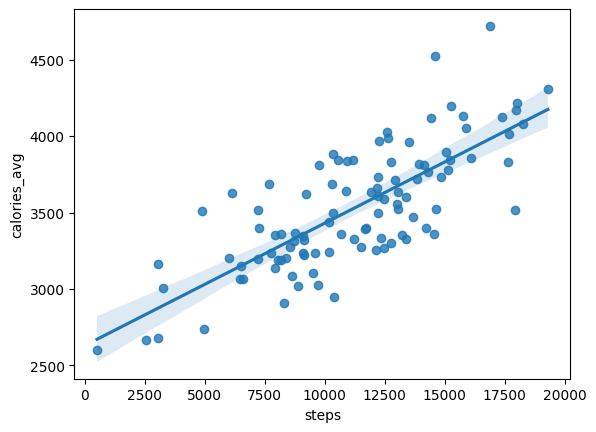

In [24]:
sns.regplot(x='steps', y='calories_avg', data=df_summary)


In [25]:
df_summary['day_of_week'] = pd.Categorical(df_summary['day_of_week'])


<Axes: xlabel='week', ylabel='weight'>

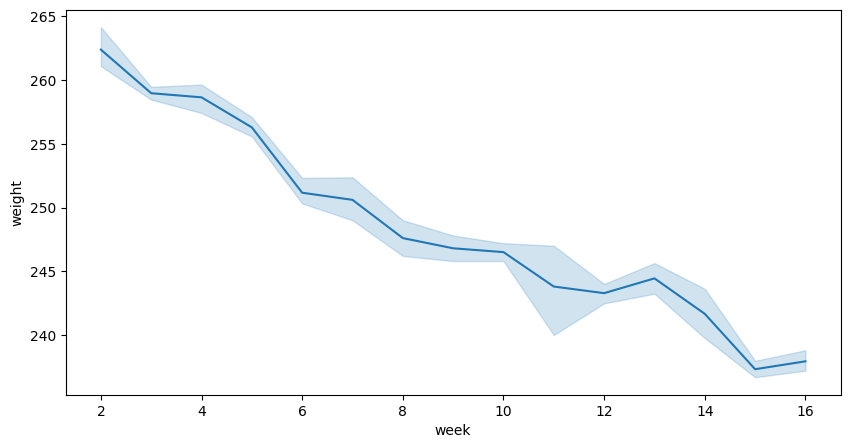

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.lineplot(data=df_summary, x='week', y='weight')
